# PIL bevezetés - variációk egy témára

![generative_1](figures/generative_1.png)

<b>Forrás: </b> {cite}`tran_stupid_head, vanoost, kunstmuseum`

https://www.lerandom.art/our-collection

Az ábrán 9db különböző kép látható. Milyen állításokat tudunk megfogalmazni a példák alapján?

- a képeken 1 téglalap és 1 kör látható
- a kör a téglalap fölött helyezkedik el, fedheti azt
- a kör középpontja a vásznon van
- a téglalap és a kör kilóghatnak a vászonról
- a háttér általában világos szín, a téglalap sötét, a kör narancssárga
- a képek mérete változik

## Szükséges könyvtárak importálása

In [1]:
from PIL import Image, ImageDraw
import random

## Véletlen színt választó függvény

RGB színtér helyett be lehet vezetni az RGBA-t precízebb eredmények érdekében. Bővebben az RGBA megoldásról lejjebb.

In [2]:
def randomColor(factor):
    color = ()
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    
    color = (int(r*factor),int(g*factor),int(b*factor))

    return color

## Véletlen tégalalap rajzolása

A téglalap elhelyezésére több megoldás is létezik, azonban ügyelni kell arra, hogy az x0,y0 koordinátáknak kisebbnek kell lenni, mint x1,y1. Tehát ha mindkét koordinátapárt 0 és teljes méret közötti véletlen számmal generáljuk, akkor érdemes logikát implementálni a számok értékének ellenőrzésére.

A téglalap elhelyezését megválaszthatjuk úgy, hogy az első koordinátapárt (x0,y0) véletlenszerűen a 0 és kép méreteinek fele között határozza meg, tehát a vászon bal felső negyede. A második koordinátapárt (x1, y1) kép méreteinek fele és kép teljes mérete közötti véletlen számok alkotják.

Az alábbi megoldás az első koordinátapár maximumát a teljes méretek valahányad része adja és a második koordinátapár esetén minimumértékként szerepel. Ebben az esetben még mindig előfordulhat, hogy nagyon kicsi téglalapot generál, de a képlet finomításával jobb eredmények érhetők el.

pl.: 

<code>x1 = random.randint(width-int(width/factor),width)</code>

<code>y1 = random.randint(width-int(height/factor),height)</code>

In [3]:
def drawRectangle(width, height):
    factor = 3
    x0 = random.randint(0,int(width/factor))
    y0 = random.randint(0,int(height/factor))
    x1 = random.randint(int(width/factor),width)
    y1 = random.randint(int(height/factor),height)

    rectangle_color = randomColor(0.5)
    rectangle = [x0,y0,x1,y1]

    draw.rectangle(rectangle,fill=rectangle_color)

## Véletlen kör rajzolása

Kör a téglalaphoz hasonlóan kell rajzolni, tehát a bal felső és jobb alsó koordinátapár megadásával. Esetünkben a kör középpontja lehet a vászon peremén, ezért célszerűbb véletlenszerű középpontot választani a váaszon területén, majd azt átszámolni a x0,y0,x1,y0 koordinátákra.

In [4]:
def drawEllipse(width,height):
    x = random.randint(0,width)
    y = random.randint(0,height)
    r = random.randint(int(width/4), int(width/2))        
    x0 = x - r
    y0 = y - r
    x1 = x + r
    y1 = y + r

    ellipse_color = (random.randint(150,255),75,25)
    ellipse = [x0,y0,x1,y1]

    draw.ellipse(ellipse,fill=ellipse_color)

## Kép törlése függvény

In [5]:
def resetImage(width, height, bg):
    draw.rectangle([0,0,width,height],fill=bg)

## Kép elkészítése

Meghatározzuk a vászon méretét.

In [6]:
image_width = 400
image_height = 600

Létrehozzuk a vásznat és a rajzoláshoz szükséges <code>PIL.ImageDraw.ImageDraw</code> osztályt.

In [7]:
image = Image.new("RGB", (image_width, image_height))
draw = ImageDraw.Draw(image)

Ezek után már csak a fentebb elhelyezett és megír függvények meghívására van szükség.
A <code>resetImage()</code> ebben az esetben két feladatot tölt be. Egyrészt véletlenszerű háttérszínt határoz meg, másrészt többszöri futtatás esetén a vászon törléséért is felel.

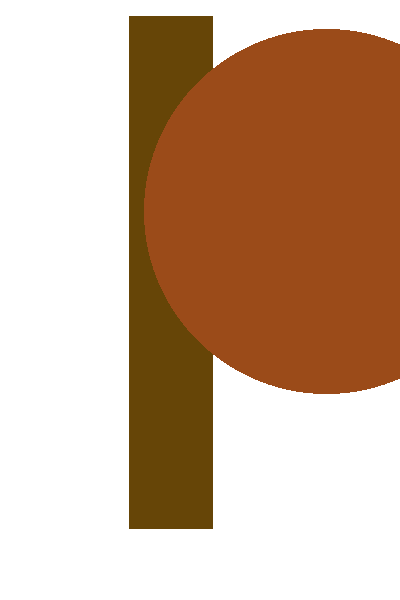

In [8]:
resetImage(image_width,image_height,randomColor(5))

drawRectangle(image_width,image_height)
drawEllipse(image_width, image_height)

display(image)

## RGBA használata a pontosabb árnyalatok kedvéért

A program tovább fejleszthető, ha RGB színtér helyett bevezetjük az RGBA-t. Ezzel a könnyebben és pontosabban lehet világos és sötét színárnyalatokat generálni. A <code>randomColor()</code> függvényt érdemes ennek tekintetében frissíteni. 

<code>image = Image.new("RGBA", (width, height), "black")</code>

In [9]:
def randomColorA(alpha):
    color = ()
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    
    color = (r,g,b,alpha)

    return color

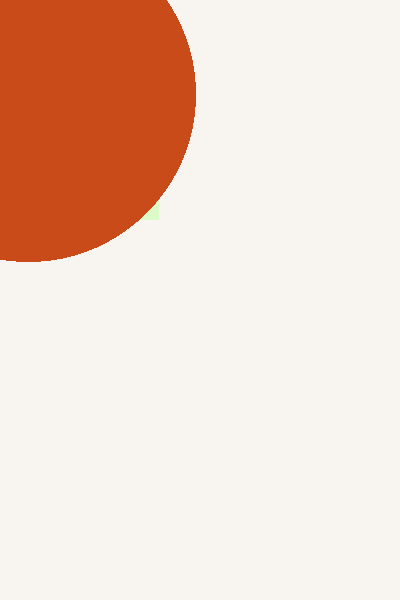

In [10]:
image = Image.new("RGBA", (image_width, image_height))
draw = ImageDraw.Draw(image)

bgcolor = randomColorA(25)
draw.rectangle([0,0,image_width,image_height],fill=bgcolor)

factor = 3
x0 = random.randint(0,int(image_width/factor))
y0 = random.randint(0,int(image_height/factor))
x1 = random.randint(int(image_width/factor),image_width)
y1 = random.randint(int(image_height/factor),image_height)

rectangle_color = randomColorA(200)
rectangle = [x0,y0,x1,y1]

draw.rectangle(rectangle,fill=rectangle_color)

drawEllipse(image_width,image_height)

display(image)

## Kép pontos paramétereinek megjelenítése

Milyen fő paraméterek határozzák meg a kép kinézetét? Adjuk hozzá a képhez az adatokat.

A Kör méretét és színét módosítottjuk, illetve a függvények visszatérítik a kiíratásra szánt értékeket.

In [11]:
def drawEllipseA(width,height,alpha):
    x = random.randint(0,width)
    y = random.randint(0,height)
    r = random.randint(int(width/4), int(width/3))        
    x0 = x - r
    y0 = y - r
    x1 = x + r
    y1 = y + r

    ellipse_color = (random.randint(180,255),random.randint(80,150),random.randint(0,50),alpha)
    ellipse = [x0,y0,x1,y1]

    draw.ellipse(ellipse,fill=ellipse_color)    
    
    return ellipse, ellipse_color

In [12]:
def drawRectangleA(width, height,alpha):
    factor = 4
    x0 = random.randint(0,int(width/factor))
    y0 = random.randint(0,int(height/factor))
    x1 = random.randint(width-int(width/factor),width)
    y1 = random.randint(width-int(height/factor),height)

    rectangle_color = randomColorA(alpha)
    rectangle = [x0,y0,x1,y1]

    draw.rectangle(rectangle,fill=rectangle_color)

    return rectangle, rectangle_color    

In [13]:
def drawBackgroundA(width, height, alpha):
    bgcolor = randomColorA(alpha)
    background = [0,0,width,height]

    draw.rectangle(background,fill=bgcolor)

    return background, bgcolor

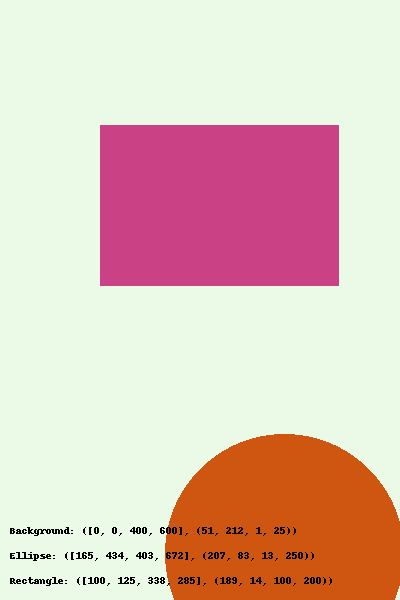

In [14]:
image = Image.new("RGBA", (image_width, image_height))
draw = ImageDraw.Draw(image)

bg =drawBackgroundA(image_width,image_height,25)
x = drawRectangleA(image_width,image_height,200)
y = drawEllipseA(image_width,image_height,250)

draw.text([10,525],"Background: "+str(bg),fill="black")
draw.text([10,550],"Ellipse: " +str(y), fill="black")
draw.text([10,575],"Rectangle: "+str(x),fill="black")

display(image)